# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2 : Propiedades en Venta</center>
## <center>Parte 3</center>
### <center> Grupo 22 </center>
### <center> Integrantes: </center>
##### <center> Federico Martin Forte,  Francisco Sobral,  Ian Klaus von der Heyde,  Juan Pablo Aschieri,  Joaquin Rivero  </center>

# Carga de Datos y librerías

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

import joblib

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
viviendas_train=pd.read_csv('./TP1/Datasets/viviendas_caba_train.csv').copy()
viviendas_test=pd.read_csv('./TP1/Datasets/viviendas_caba_test.csv').copy()

In [3]:
viviendas = pd.concat([viviendas_train, viviendas_test]).reset_index()

# 3. Ensamble de Modelos

## Voting

In [4]:
#Importo los datos de entrenamiento y prueba de nuestro Random Forest

y_train = pd.read_csv('./TP1/Datasets/y_train_property_type.csv').copy()
y_test = pd.read_csv('./TP1/Datasets/y_test_property_type.csv').copy()

x_train = pd.read_csv('./TP1/Datasets/x_train_property_type.csv').copy()
x_test = pd.read_csv('./TP1/Datasets/x_test_property_type.csv').copy()

### Voting sobre modelos nuevos

Se evaluarán distintos clasificadores para ver cual me conviene para obtener mejores métricas.

In [5]:

# Predicciones con decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)


# Predicciones con logistic regression model
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


# Predicciones con naive bayes model
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

# Predicciones con modelo AdaBoost
ada_boost_clf = AdaBoostClassifier()
ada_boost_clf.fit(x_train, y_train)
y_pred_ada = ada_boost_clf.predict(x_test)

# Predicciones con modelo Random Forest
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train, y_train)
y_pred_rnd = rnd_clf.predict(x_test)

# Predicciones con modelo KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred_knn = knn_clf.predict(x_test)

Imprimo los resultados.

In [6]:
# evaluating the models based on their f-1 scores
f1_dtc = f1_score(y_test, y_pred_dtc,average='weighted')
f1_lr = f1_score(y_test, y_pred_lr,average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb,average='weighted')
f1_rnd = f1_score(y_test, y_pred_rnd,average='weighted')
f1_knn = f1_score(y_test, y_pred_knn,average='weighted')
f1_ada = f1_score(y_test, y_pred_ada,average='weighted')

# print the f-1 scores
print('F1-score of decision tree classifier: {}'.format(np.round(f1_dtc,4)))
print('F1-score of support vector machine: {}'.format(np.round(f1_lr,4)))
print('F1-score of naive bayes classifier: {}'.format(np.round(f1_gnb,4)))
print('F1-score of random forest classifier: {}'.format(np.round(f1_rnd,4)))
print('F1-score of KNN classifier: {}'.format(np.round(f1_knn,4)))
print('F1-score of AdaBoost classifier: {}'.format(np.round(f1_ada,4)))

F1-score of decision tree classifier: 0.7051
F1-score of support vector machine: 0.5452
F1-score of naive bayes classifier: 0.3733
F1-score of random forest classifier: 0.7435
F1-score of KNN classifier: 0.6116
F1-score of AdaBoost classifier: 0.5932


Acá podemos ver que los mejores 3 modelos fueron los de Decision Tree Classifier, Random Forest Classifier y KNN. Se Procede a realizar el Voting con dichos tres modelos. Para obtener mejores resultados, también se evaluará realizando una votación de tipo Hard y una de tipo Soft y utilizar la que devuelva mejores resultados.

In [7]:
#Creo ensemble de Votación Hard
vot_clf_h = VotingClassifier(estimators = [('dtc', dtc), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Creo ensemble de Votación Soft
vot_clf_s = VotingClassifier(estimators = [('dtc', dtc), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'soft')


#Entreno ambos ensembles
vot_clf_h.fit(x_train, y_train)
vot_clf_s.fit(x_train, y_train)

#Evaluo en conjunto de test
pred_h = vot_clf_h.predict(x_test)
pred_s = vot_clf_s.predict(x_test)

In [8]:
#Calculo accuracy
print("RESULTADOS HARD VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_h)))
print('F1-score: {}'.format(f1_score(y_test, pred_h,average="weighted")))
print("Precision Score : ",precision_score(y_test,pred_h,pos_label='positive',average="weighted"))
print("Recall Score :" , recall_score(y_test, pred_h, pos_label='positive',average="weighted"))

print("\nRESULTADOS SOFT VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_s)))
print('F1-score: {}'.format(f1_score(y_test, pred_s,average="weighted")))
print("Precision Score: ",precision_score(y_test,pred_s,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, pred_s, pos_label='positive',average="weighted"))

RESULTADOS HARD VOTING:

Accuracy Score: 0.7333118001722653
F1-score: 0.732873507158843
Precision Score :  0.7339113079422364
Recall Score : 0.7333118001722653

RESULTADOS SOFT VOTING:

Accuracy Score: 0.726905684754522
F1-score: 0.7263349765305099
Precision Score:  0.7271228440751283
Recall Score: 0.726905684754522


Concluimos que conviene utilizar el metodo de Hard voting.

### Voting sobre nuestros modelos 

In [9]:
#Importo los modelos del TP1

knn_clf = joblib.load('./TP1/Models/knn_mejor_performance')
rnd_clf = joblib.load('./TP1/Models/rf_mejor_performance')
dtc_clf = joblib.load('./TP1/Models/arbol_mejor_performance')

In [10]:
# Predicciones con modelo Knn
y_pred_knn = knn_clf.predict(x_test)

# Predicciones con modelo Random Forest
y_pred_rnd = rnd_clf.predict(x_test)

# Predicciones con modelo DTC
y_pred_dtc = dtc_clf.predict(x_test)


In [11]:
print("\nRESULTADOS K_nearest neighbors:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_knn)))
print('F1-score: {}'.format(f1_score(y_test, y_pred_knn,average="weighted")))
print("Precision Score: ",precision_score(y_test,y_pred_knn,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, y_pred_knn, pos_label='positive',average="weighted"))

print("\nRESULTADOS Random Forest:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_rnd)))
print('F1-score: {}'.format(f1_score(y_test, y_pred_rnd,average="weighted")))
print("Precision Score: ",precision_score(y_test,y_pred_rnd,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, y_pred_rnd, pos_label='positive',average="weighted"))

print("\nRESULTADOS Decision Tree Classifier:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_dtc)))
print('F1-score: {}'.format(f1_score(y_test, y_pred_dtc,average="weighted")))
print("Precision Score: ",precision_score(y_test,y_pred_dtc,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, y_pred_dtc, pos_label='positive',average="weighted"))


RESULTADOS K_nearest neighbors:

Accuracy Score: 0.6763027562446167
F1-score: 0.674845002332972
Precision Score:  0.6760850373211389
Recall Score: 0.6763027562446167

RESULTADOS Random Forest:

Accuracy Score: 0.743270887166236
F1-score: 0.7422169581799882
Precision Score:  0.7453531747293577
Recall Score: 0.743270887166236

RESULTADOS Decision Tree Classifier:

Accuracy Score: 0.7037575366063739
F1-score: 0.7038775368622544
Precision Score:  0.7041015747256649
Recall Score: 0.7037575366063739


Tras predecir los modelos individualmente, vamos a realizar el Voting para ver si mejora.

In [12]:
#Creo ensemble de Votación Hard
vot_clf_h = VotingClassifier(estimators = [('dtc', dtc_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Creo ensemble de Votación Soft
vot_clf_s = VotingClassifier(estimators = [('dtc', dtc_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'soft')


#Entreno ambos ensembles
vot_clf_h.fit(x_train, y_train)
vot_clf_s.fit(x_train, y_train)

#Evaluo en conjunto de test
pred_h = vot_clf_h.predict(x_test)
pred_s = vot_clf_s.predict(x_test)



#Calculo accuracy
print("RESULTADOS HARD VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_h)))
print('F1-score: {}'.format(f1_score(y_test, pred_h,average="weighted")))
print("Precision Score : ",precision_score(y_test,pred_h,pos_label='positive',average="weighted"))
print("Recall Score :" , recall_score(y_test, pred_h, pos_label='positive',average="weighted"))

print("\nRESULTADOS SOFT VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_s)))
print('F1-score: {}'.format(f1_score(y_test, pred_s,average="weighted")))
print("Precision Score: ",precision_score(y_test,pred_s,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, pred_s, pos_label='positive',average="weighted"))

RESULTADOS HARD VOTING:

Accuracy Score: 0.7337962962962963
F1-score: 0.7331204066801106
Precision Score :  0.7346815391566508
Recall Score : 0.7337962962962963

RESULTADOS SOFT VOTING:

Accuracy Score: 0.7256675279931094
F1-score: 0.7251570618717043
Precision Score:  0.7258290336205333
Recall Score: 0.7256675279931094


Concluimos que conviene utilizar el metodo de Hard voting.

### Conclusiones Voting

Como podemos ver tras comparar los dos modelos, nos da una métrica superior el Voting realizado con los modelos del TP1. Esto se debe a que dichos modelos fueron ajustados de mejor manera y son mas precisos. Sin embargo, algo que nos llamo la atención es que los modelos de Random Forest obtienen mejores resultados que el propio Voting.

## Stacking

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import joblib

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

import plotly.graph_objects as go
%matplotlib inline

In [14]:
#selecciono variables regresoras y a predecir
x_train = viviendas_train[['latitud','longitud', 'property_surface_total', 'property_surface_covered']]
x_test = viviendas_test[['latitud','longitud', 'property_surface_total', 'property_surface_covered']]

y_train = viviendas_train.property_price
y_test = viviendas_test.property_price

#Normalizo
scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Realizamos Stacking con modelos nuevos

In [15]:
#Creo los modelos
knn_n = KNeighborsRegressor()
gbr_n = GradientBoostingRegressor()
xgboost_n = xgb.XGBRegressor()

In [16]:
# get a stacking ensemble of models
def get_stacking():
 
 # define the base models
 level0 = list()
 level0.append(('knn', knn_n)) 
 level0.append(('xgboost', xgboost_n)) 
 level0.append(('gbr', gbr_n)) 

 # define meta learner model
 level1 = LinearRegression()

 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, 
                                    final_estimator=level1, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
 

 return model

In [17]:
# get a list of models to evaluate

def get_models():
 models = dict()
 models['knn'] = knn_n
 models['xgb'] = xgboost_n
 models['gbr'] = gbr_n
 models['stacking'] = get_stacking()

 return models

In [18]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [19]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [20]:
def imprimir_metricas_regresion(target_test, precios_predichos):
    # Mean Square Error
    mse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=True
    )

    print(f"El error (mse) de test es: {mse}")

    # Root Mean Square Error
    rmse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=False
    )

    print(f"El error (rmse) de test es: {rmse}")

    r2 = metrics.r2_score(target_test, precios_predichos)
    print(f"El score R2 es: {r2}")

In [21]:
stacking = get_stacking()

In [22]:
"""
stacking.fit(x_train, y_train)
joblib.dump(stacking, './Models/stacking_modelos_nuevos')"""

stacking = joblib.load('./Models/stacking_modelos_nuevos')

[13:43:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [23]:
#Evaluo las metricas de los modelos por individual

print("\nKNN Regressor:")
knn_f = knn_n.fit(x_train, y_train)
y_pred = knn_f.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

print("\nXGBoost Regressor:")
xgboost_f = xgboost_n.fit(x_train, y_train)
y_pred = xgboost_f.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

print("\nGradient Boosting Regressor:")
gbr_f = gbr_n.fit(x_train, y_train)
y_pred = gbr_f.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)



KNN Regressor:
El error (mse) de test es: 11821616533.516012
El error (rmse) de test es: 108727.25754619221
El score R2 es: 0.873594814426625

XGBoost Regressor:
El error (mse) de test es: 10919589772.080612
El error (rmse) de test es: 104496.84096699102
El score R2 es: 0.8832399302065291

Gradient Boosting Regressor:
El error (mse) de test es: 14199870778.525698
El error (rmse) de test es: 119163.21067563469
El score R2 es: 0.8481648177481839


In [24]:
#Evaluo el Stacking de los modelos

y_pred = stacking.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

El error (mse) de test es: 9946147391.381865
El error (rmse) de test es: 99730.37346456628
El score R2 es: 0.8936486729049878


In [25]:
performance_test = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred.round(),
                            'Error': y_test - y_pred.round()})
performance_test.head(5)

,Valor Real,Prediccion,Error
0,140000.0,125409.0,14591.0
1,69900.0,87918.0,-18018.0
2,75900.0,76359.0,-459.0
3,315000.0,196524.0,118476.0
4,79000.0,77405.0,1595.0


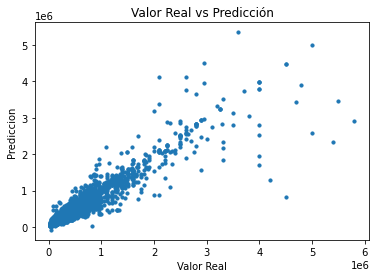

In [26]:
scatter_real_predict_test = performance_test.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 

Podemos observar como las metricas por separado son inferiores al Stacking. Esto nos demuestra que nuestro modelo esta bien hecho y conviene utilizar el Stacking.

### Realizamos Stacking con nuestros modelos anteriores

In [27]:
#Importo los modelos del TP1

gbr = joblib.load('./TP1/Models/rand_GBR')
knn = joblib.load('./TP1/Models/rand_knn')
xgboost = joblib.load('./TP1/Models/rand_xgb2')

In [28]:
# get a stacking ensemble of models
def get_stacking():
 
 # define the base models
 level0 = list()
 level0.append(('knn', knn )) 
 level0.append(('xgboost', xgboost )) 
 level0.append(('gbr', gbr)) 

 # define meta learner model
 level1 = LinearRegression()

 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, 
                                    final_estimator=level1, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
 

 return model

In [29]:
# get a list of models to evaluate

def get_models():
 models = dict()
 models['knn'] = knn 
 models['xgb'] = xgboost 
 models['gbr'] = gbr 
 models['stacking'] = get_stacking()

 return models

In [30]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [31]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [32]:
def imprimir_metricas_regresion(target_test, precios_predichos):
    # Mean Square Error
    mse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=True
    )

    print(f"El error (mse) de test es: {mse}")

    # Root Mean Square Error
    rmse = metrics.mean_squared_error(
        y_true=target_test, y_pred=precios_predichos, squared=False
    )

    print(f"El error (rmse) de test es: {rmse}")

    r2 = metrics.r2_score(target_test, precios_predichos)
    print(f"El score R2 es: {r2}")

In [33]:
stacking = get_stacking()

In [34]:
"""
stacking.fit(x_train, y_train)
joblib.dump(stacking, './Models/stacking_modelos_tp1')
"""
stacking = joblib.load('./Models/stacking_modelos_tp1')

In [35]:
#Evaluo las metricas de los modelos por individual

print("\nKNN Regressor:")
y_pred = knn.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

print("\nXGBoost Regressor:")
y_pred = xgboost.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

y_pred = gbr.predict(x_test)
print("\nGradient Boosting Regressor:")
imprimir_metricas_regresion(y_test, y_pred)


KNN Regressor:
El error (mse) de test es: 9903379174.372705
El error (rmse) de test es: 99515.72325202035
El score R2 es: 0.894105981293596

XGBoost Regressor:
El error (mse) de test es: 9683927892.144327
El error (rmse) de test es: 98406.95042599546
El score R2 es: 0.8964525114805418

Gradient Boosting Regressor:
El error (mse) de test es: 8607454252.030666
El error (rmse) de test es: 92776.36688311666
El score R2 es: 0.9079629381516854


In [36]:
#Evaluo el Stacking de los modelos

y_pred = stacking.predict(x_test)
imprimir_metricas_regresion(y_test, y_pred)

El error (mse) de test es: 8398373997.479234
El error (rmse) de test es: 91642.64289881231
El score R2 es: 0.910198573887405


In [37]:
performance_test = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred.round(),
                            'Error': y_test - y_pred.round()})
performance_test.head(5)

,Valor Real,Prediccion,Error
0,140000.0,114489.0,25511.0
1,69900.0,81976.0,-12076.0
2,75900.0,68223.0,7677.0
3,315000.0,202399.0,112601.0
4,79000.0,76093.0,2907.0


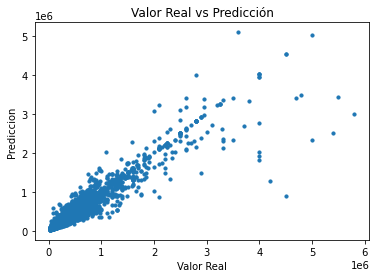

In [38]:
scatter_real_predict_test = performance_test.plot.scatter(x="Valor Real", y="Prediccion", s=10, c='tab:blue').set(title="Valor Real vs Predicción",xlabel='Valor Real',ylabel='Prediccion') 

### Conclusion Stacking

Como podemos observar en los dos modelos planteados, obtenemos que el segundo modelo es el mas preciso. Esto es lo mas lógico ya que es un modelo el cual utiliza modelos de regresión creados especificamente en el TP1, mientras que el otro son modelos creados de cero sin ninguna especificación.

# 4. Conclusiones

### Aspectos relevantes:

+ Parte 1: Procesamiento de Lenguaje Natural
  + Para elegir las nuevas columnas buscamos las palabras con más apariciones ordenadas de mayor a menor, y luego elegimos algunas de estas palabras que creímos que aportaban valor.
  + La ampliación del dataset contribuyó a mejorar el resultado de XGBoost pero al volver a buscar "mejores hiperparámetros" llegamos prácticamente a lo mismo, ya que creemos que las nuevas columnas no agregan suficiente información como para conseguir mejores métricas con distintos hiperparámetros. 
  + Dado las mejoras en los resultados de XGBoost concluimos que nuestras nuevas columnas sí aportan valor al dataset original, lo que es lógico por su naturaleza. Por ejemplo, la columna "a_estrenar" aporta mucho valor, ya que no es lo mismo una vivienda nueva que usada.  
<br />
    
+ Parte 2: Redes Neuronales  
  + Corrimos muchos modelos de redes con diferentes combinaciones de hiperparámetros sobre datasets reducidos y seleccionamos los que daban mejores resultados, y los corrimos sobre el dataset completo para así quedarnos con el mejor modelo.
  + Los resultados obtenidos no cumplieron las expectativas (ni en regresión ni en clasificación) ya que los modelos utilizados en el TP1 dieron mejores métricas
  + Creemos que esto se puede deber a varios motivos:
    + Mala selección de hiperparámetros y capas
    + Mala adaptación de las redes a nuestro problema

<br /> 

+ Parte 3: Ensambles de Modelos
  + Para esta parte decidimos hacer 2 modelos para cada ensamble, uno con nuestros anteriores modelos del TP1 (optimizados) y otro con nuevos modelos sin optimizar sus hiperparámetros. Si bien las métricas del ensamble de los modelos del TP1 mejoraron con respecto a los modelos sin optimizar, la mejora fue ínfima. Esto sigue la línea de la frase "muchos estimadores mediocres juntos generan un buen estimador".
  De ambas formas los modelos obtenidos a través de los ensambles fueron mejores que los modelos individuales del primer Trabajo Práctico (a excepción de RandomForest (clasificación) y GradientBoostingRegressor (regresión) que dieron métricas mejores o muy similares que las del ensamble).
  
  + En conclusión vemos que un modelo de ensamble puede ser muy útil y lograr muy buenas métricas si uno cuenta con modelos poco optimizados, ya que con poco esfuerzo uno puede reutilizarlos y obtener buenos resultados
  

  
  

### Mejores métricas:
+ Clasificación:
  + Random Forest (TP1): 
    + F1-score: 0.7422
    + Accuracy Score: 0.7432
+ Regresión: 
  + XGB (Utilizando hiperparámetros optimizados con el nuevo dataset ampliado):
    + Coef. de Determinación R2: 0.9127
    + El error (rmse) de test es: 88190.1086

### Opciones que hubiesemos explorado y quedaron fuera del alcance de este trabajo

+ En cuanto a la primera parte (Ampliación del dataset), se pudo haber usado algún métodos de extracción de conocimiento como lo son ExtrHech, ArgOE, DepOE o ECMes. También se pudieron haber añadido al dataset columnas como cantidad de baños o expensas las cuales tendrían valores extraídos del texto de property_title.

+ En cuanto a la segunda parte (Redes Neuronales), se pudo haber probado una grilla con mayor cantidad de hiperparámetros, como por ejemplo reguladores (L1 y L2), early stopping y dropout. También podríamos haber probado otras distintas combinaciones de capas ocultas de neuronas además de probar otro tipo de capas. Se pudo haber probado correr más iteraciones mezclando hiperparámetros.
Otra cosa que quedó fuera de nuestro alcance es hacer un ensamble entre nuestros mejores modelos de redes

+ En cuanto a la tercera parte podríamos haber usado para los ensambles algunos de nuestros modelos de redes




Como podemos observar en los dos modelos planteados, obtenemos que el segundo modelo es el mas preciso. Esto es lo mas lógico ya que es un modelo el cual utiliza modelos de regresión creados específicamente en el TP1, mientras que el otro son modelos creados de cero sin ninguna especificación.